# Prepare Data

In [1]:
#Import everything
import test_manifold_algorithms as tma
import pandas as pd
import matplotlib.pyplot as plt
import os
import MAGAN

/yunity/arusty/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
2024-05-22 21:14:03.191308: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-22 21:14:03.195379: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-22 21:14:03.250139: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 21:14:04.869

MAGAN is running on TensorFlow 2.16.1


In [2]:
"""Clear Directory"""
#Careful. This will reset all of the resutls that we have collected
####tma.clear_directory()

#Converts old way of storing files to the new - if any
#tma.change_old_files_to_new()

<><><><><><><><><><><><><><><><><><><><><><><>     Updates completed     <><><><><><><><><><><><><><><><><><><><><><><>


True

In [3]:
"""Practice Tests to Run"""
test = tma.test_manifold_algorithms(csv_file="iris.csv", split = "even", percent_of_anchors = [0.35], random_state=6739, verbose = 0)
#print(f"Anchors : {test.anchors}")
#print(f"KNN range {test.knn_range}")
#test.run_SPUD_tests(kind = ["distance"])
#test.run_DIG_tests(predict = True)
#test.run_NAMA_tests()
#test.run_DTA_tests()
#test.run_SSMA_tests()
#MAGAN.run_MAGAN(test.split_A, test.split_B, labels1 = test.labels) #MAGAN seems to be unable to run on any splits that make the features count different


In [52]:
#Veiwing with DataFrame
df = tma.upload_to_DataFrame()

#Add a combined metric to help see (The closer to 1 the better)
df["Combined_Metric"] = df["Cross_Embedding_KNN"] - df["FOSCTTM"]

#Save the Data Frame
df.to_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", index=False, na_rep='NaN')

/yunity/arusty/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/yunity/arusty/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/yunity/arusty/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As

In [5]:
#If there is no new data, we could just read in the old csvfile
df = pd.read_csv(os.getcwd()[:-12] + "ManifoldData/Data_DataFrame.csv", keep_default_na=False, na_values=['', 'NaN'], index_col= None)

In [6]:
from utils import get_DataFrame_stats
get_DataFrame_stats()

<><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>      DataFrame Statistics        <><<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>
Total Number of instances in DataFrame: 513452


 Method        Lengths
--------      ----------
 SSMA:          48630
 DTA:          48990
 Nama:          4902
 SPUD:          278160
 DIG:          132770


----------------------       Splits      ----------------------
Total data of random: 125327

 random        Lengths
--------      ----------
 SSMA:          12560
 DTA:          12560
 Nama:          1257
 SPUD:          58820
 DIG:          40130


Total data of even: 38003

 even        Lengths
--------      ----------
 SSMA:          3410
 DTA:          3420
 Nama:          343
 SPUD:          20420
 DIG:          10410


Total data of skewed: 117450

 skewed        Lengths
--------      ----------
 SSMA:          10500
 DTA:          10500
 Nama:          1050
 SPUD:          63900
 DIG:          31500


Total 

# Visualization Tests

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from utils import subset_df, plot_in_fig

## Comparing Methods with Box Plots

Observations: While DTA, DIG, SPUD, and NAMA all have similar distributions, both DIG and SPUD have instances that are signifacantly better than the other metrics. DIG preforms the best overall. 

*Note made May 10th (2k+ files taken into  account)

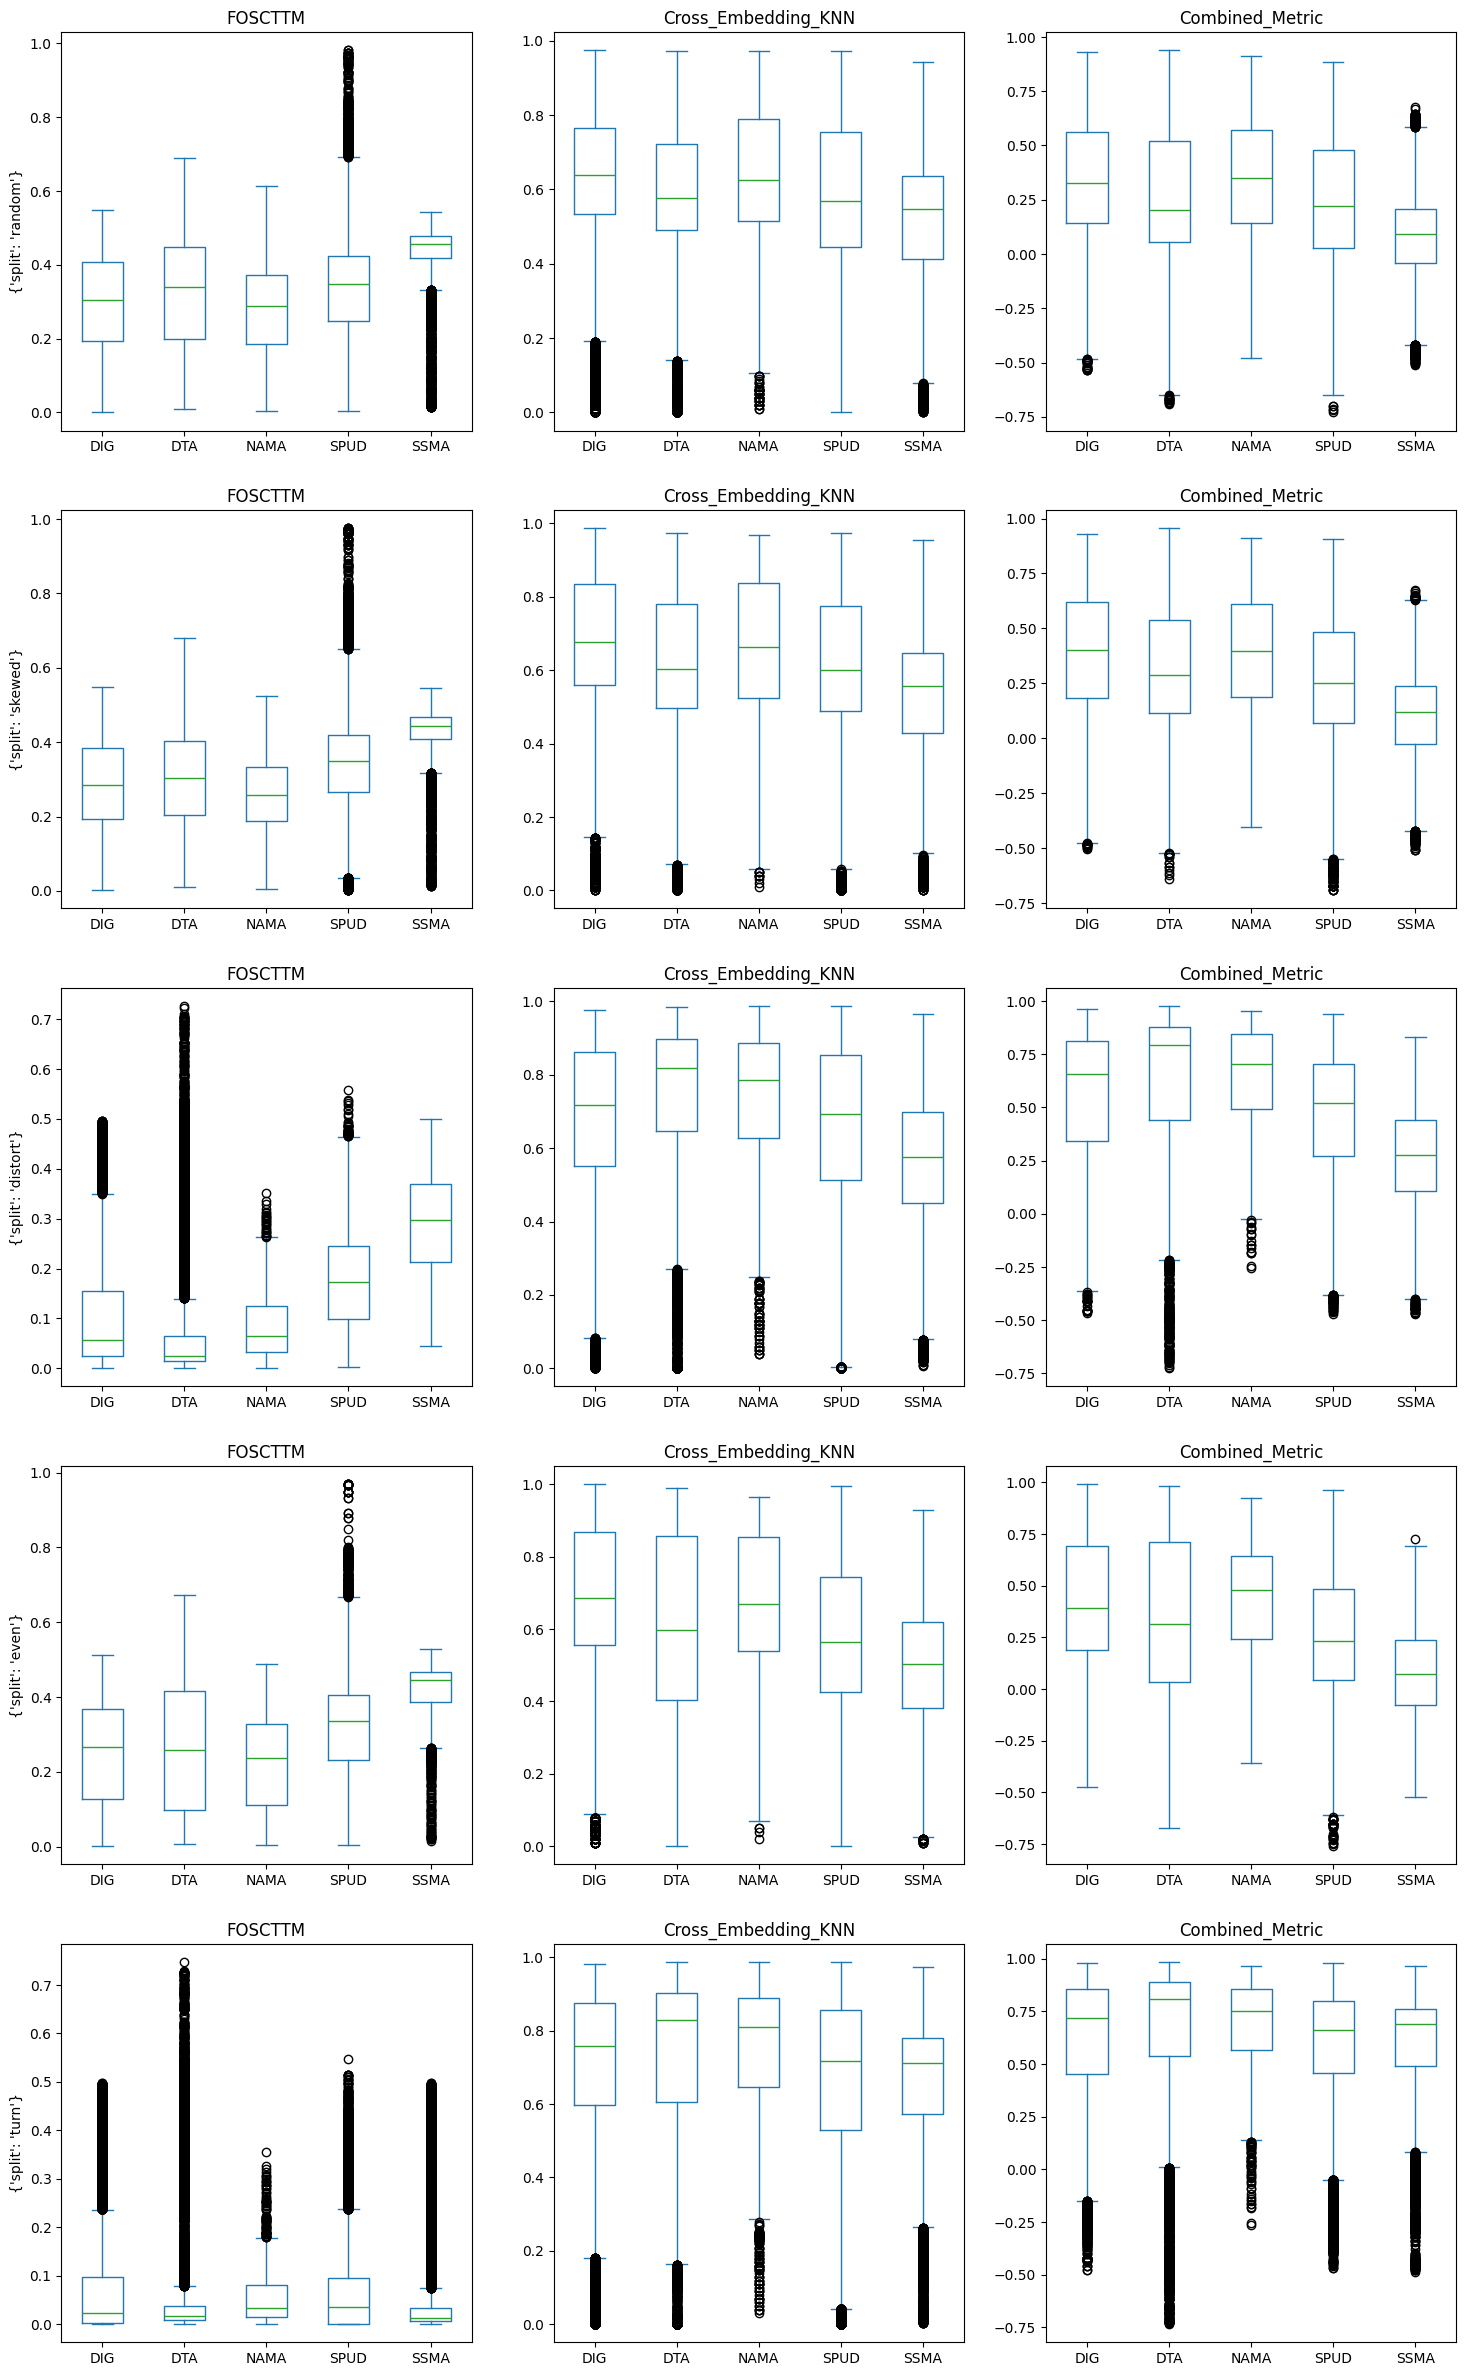

In [8]:
columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='method', kind = 'box')

## Comparing Arguments within the same Methods

### DIG

We See that Page Rank has little effect on the overall graph data

In [9]:
#If we want to see only a few csv files at a time, we can sub set it here
#df_subset2 = df[df["csv_file"] == "glass"]

#To see all of it combined
df_subset2 = df

#Change the method to DIG
df_subset2 = df_subset2[df_subset2["method"] == "DIG"]

In [10]:
df_subset2.sample(5)

,csv_file,method,seed,split,KNN,Percent_of_KNN,Percent_of_Anchors,Page_Rank,Predicted_Feature_MAE,Operation,SPUDS_Algorithm,FOSCTTM,Cross_Embedding_KNN,Combined_Metric
335990,winequality-red,DIG,4557,random,226.0,0.15,0.30,off-diagonal,0.098577,NaN,NaN,0.257622,NaN,NaN
511105,S-curve,DIG,8333,even,22.0,0.09,0.30,off-diagonal,4.007826,NaN,NaN,0.045575,0.765000,0.719425
153470,diabetes,DIG,7395,turn,18.0,0.03,0.30,full,0.425624,NaN,NaN,0.000000,0.802083,0.802083
76703,balance_scale,DIG,1380,random,15.0,0.03,0.15,None,0.302840,NaN,NaN,0.458706,0.435200,-0.023506
222640,hill_valley,DIG,9595,turn,106.0,0.17,0.30,None,0.404110,NaN,NaN,0.000000,0.688119,0.688119


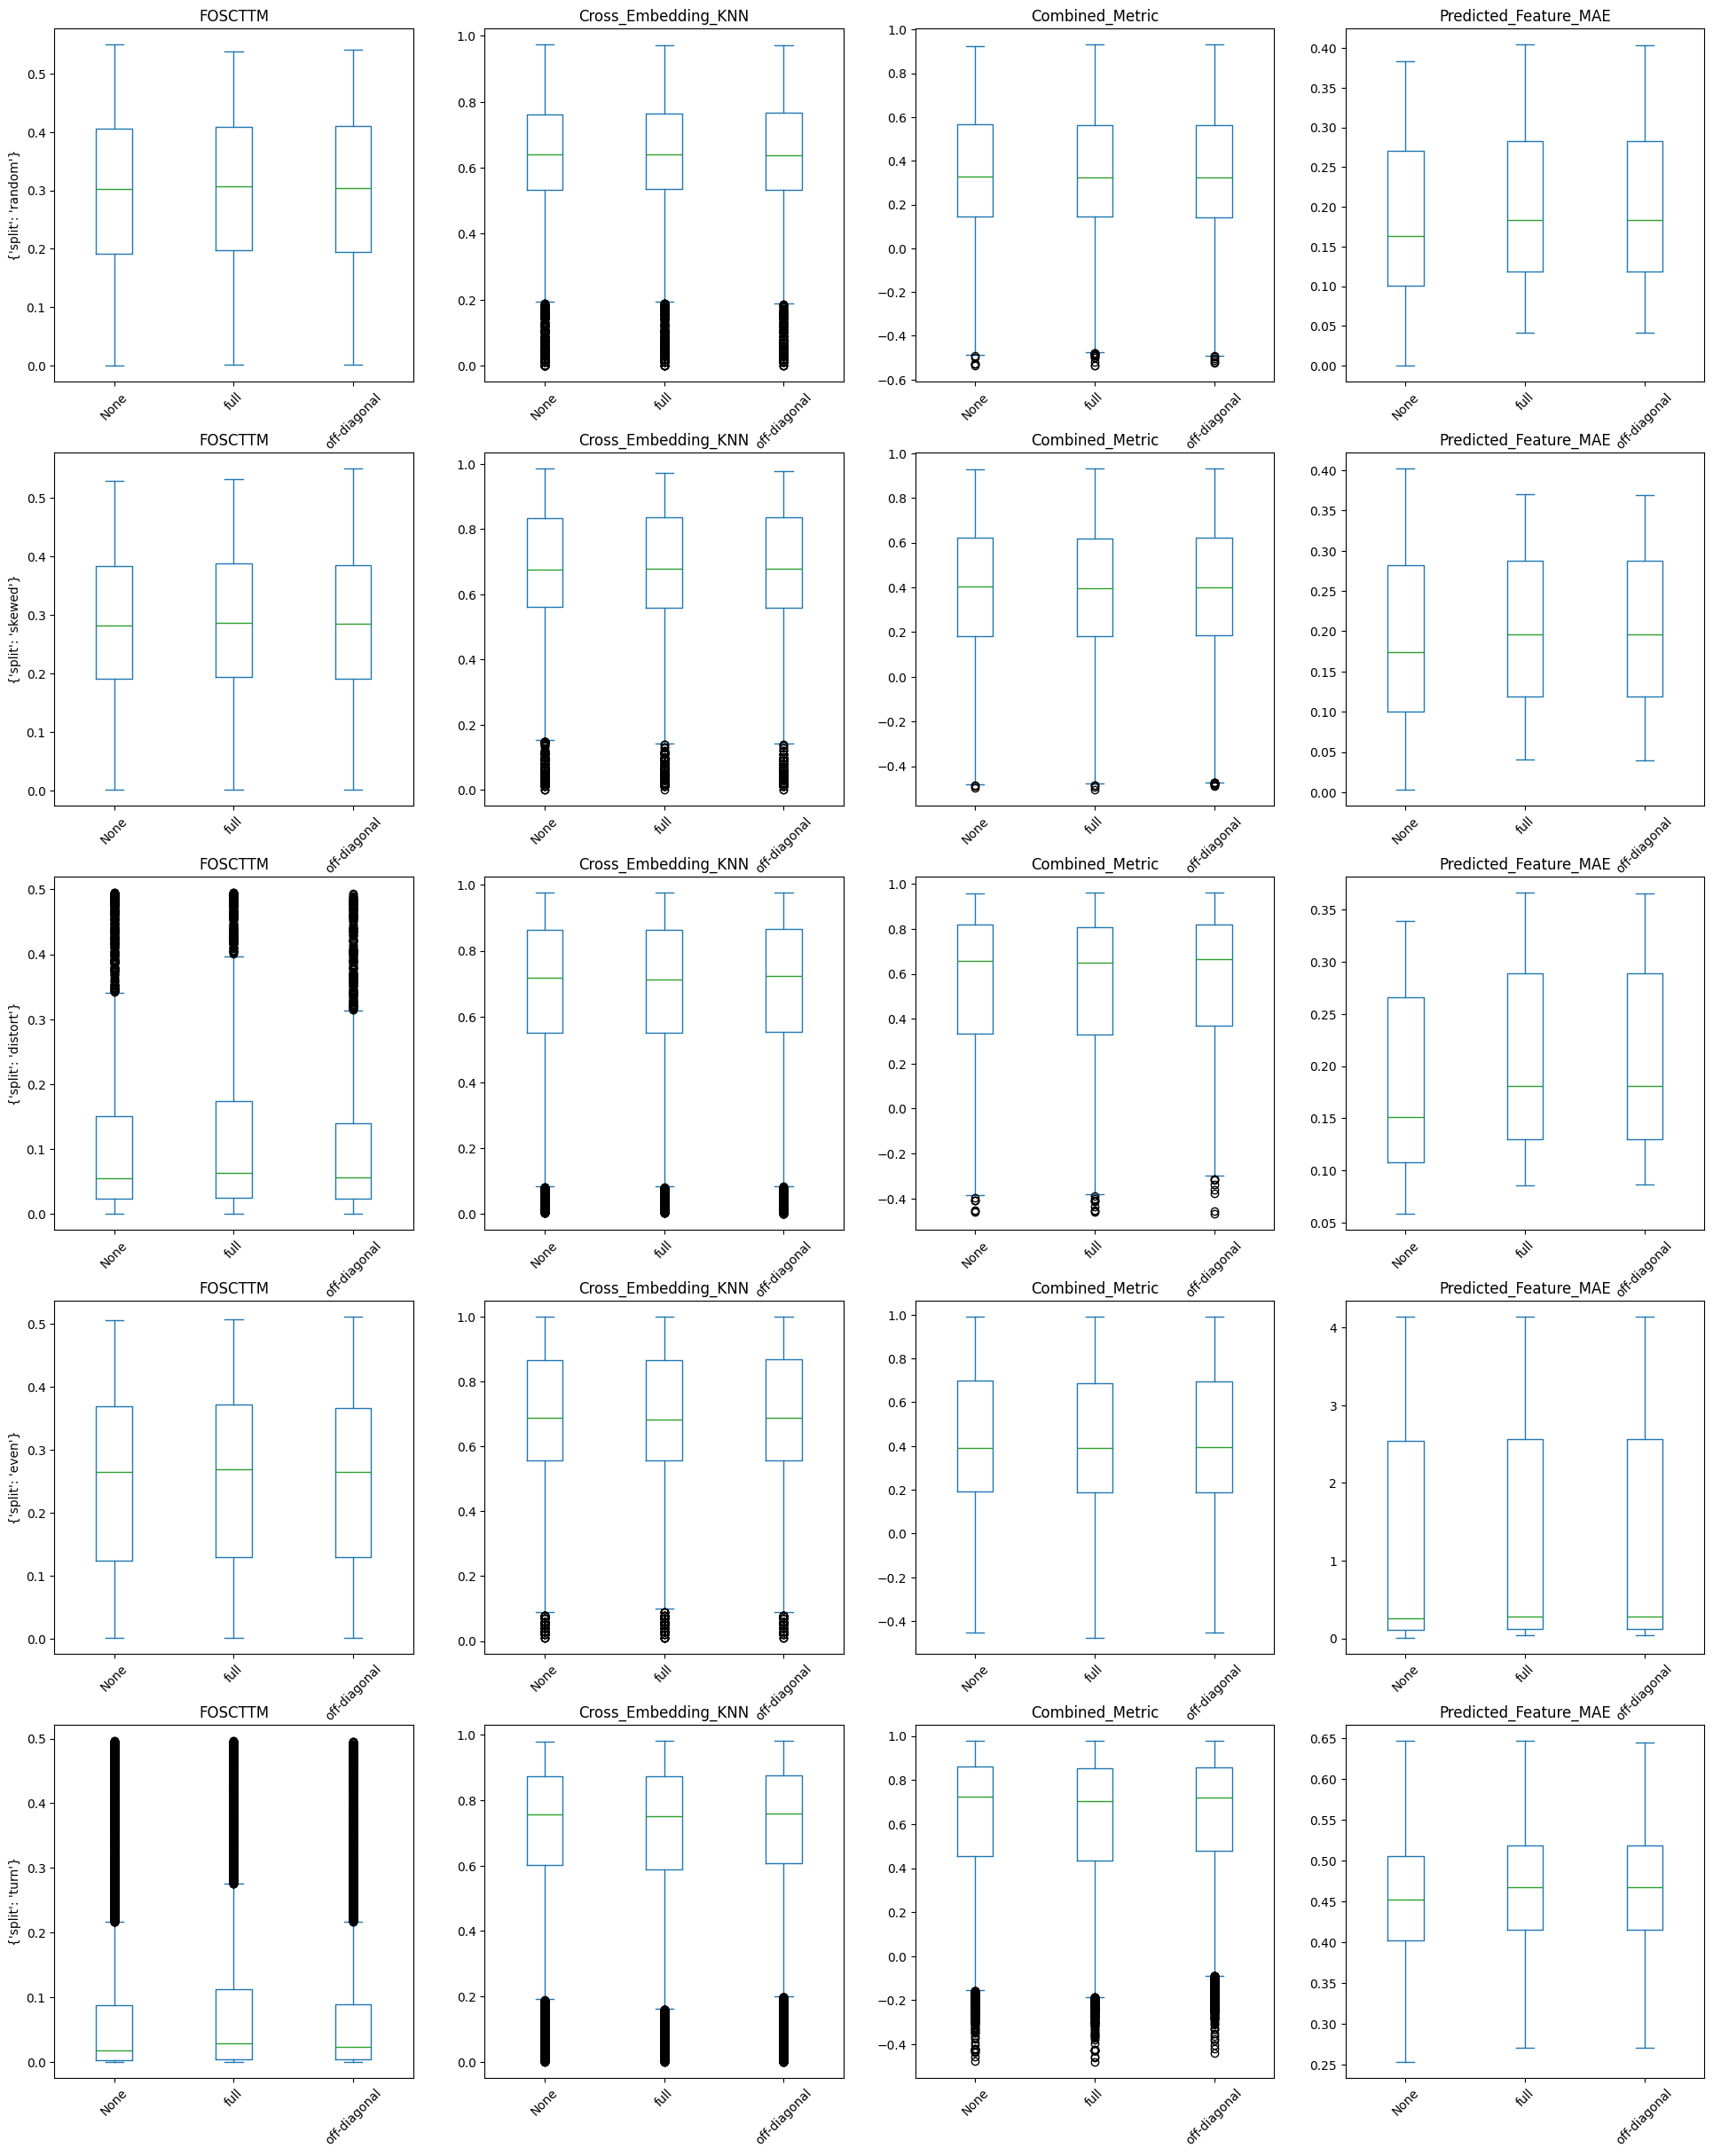

In [11]:

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}, {"column": "Predicted_Feature_MAE"}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed" #, "csv_file" : "iris"
         }, 
        {"split" : "distort" #, "csv_file" : "iris"
         },
        {"split" : "even" #, "csv_file" : "iris"
         },
         {"split" : "turn" #, "csv_file" : "iris"
         }]

plot_in_fig(columns = columns, rows = rows, by='Page_Rank', kind = 'box',  rot = 45)

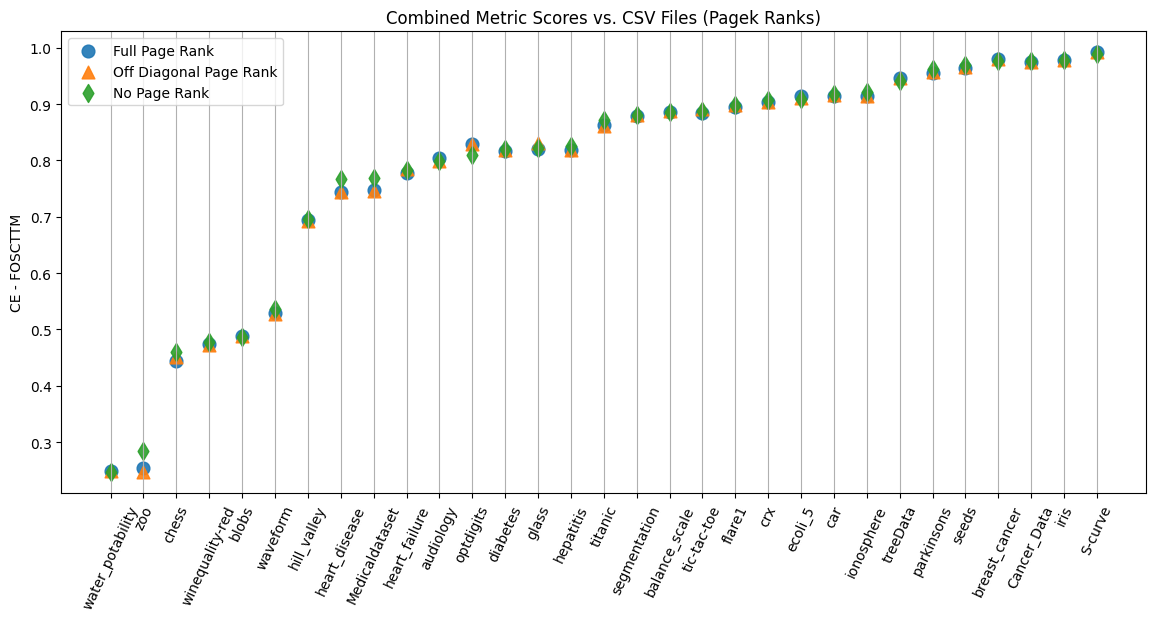

In [12]:
#Create an aggregate DF 
agregate_df = pd.DataFrame({
    'Full_Page_Rank': df[df["Page_Rank"] == "off-diagonal"].groupby("csv_file")["Combined_Metric"].max(),
    'Off-Diagonal_Page_Rank': df[df["Page_Rank"] == "full"].groupby("csv_file")["Combined_Metric"].max(),
    'No_Page_Rank': df[df["Page_Rank"] == "None"].groupby("csv_file")["Combined_Metric"].max()
})


agregate_df = agregate_df.sort_values(by = "No_Page_Rank").reset_index()

#To make it easier to add edits
key_words = {"x" : agregate_df.index,
            "s" : 84,
            "alpha" : .90}

plt.figure(figsize=(14, 6))
ax = plt.scatter(y = agregate_df["Full_Page_Rank"], label = "Full Page Rank", **key_words) #I'm back and forth on the helpfulness of the markers
ax = plt.scatter(y = agregate_df["Off-Diagonal_Page_Rank"], marker = '^', label = "Off Diagonal Page Rank", **key_words)
ax = plt.scatter(y = agregate_df["No_Page_Rank"], marker = 'd', label = "No Page Rank", **key_words)


#Show Legend
plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 65)
plt.title(f"Combined Metric Scores vs. CSV Files (Pagek Ranks)")
plt.ylabel("CE - FOSCTTM")
plt.grid(visible=True, axis = "x")
plt.legend()
plt.show()

### SPUD

Notes:
1. Distance + Avg seems to be the best metric most of the time, although they seem pretty similar

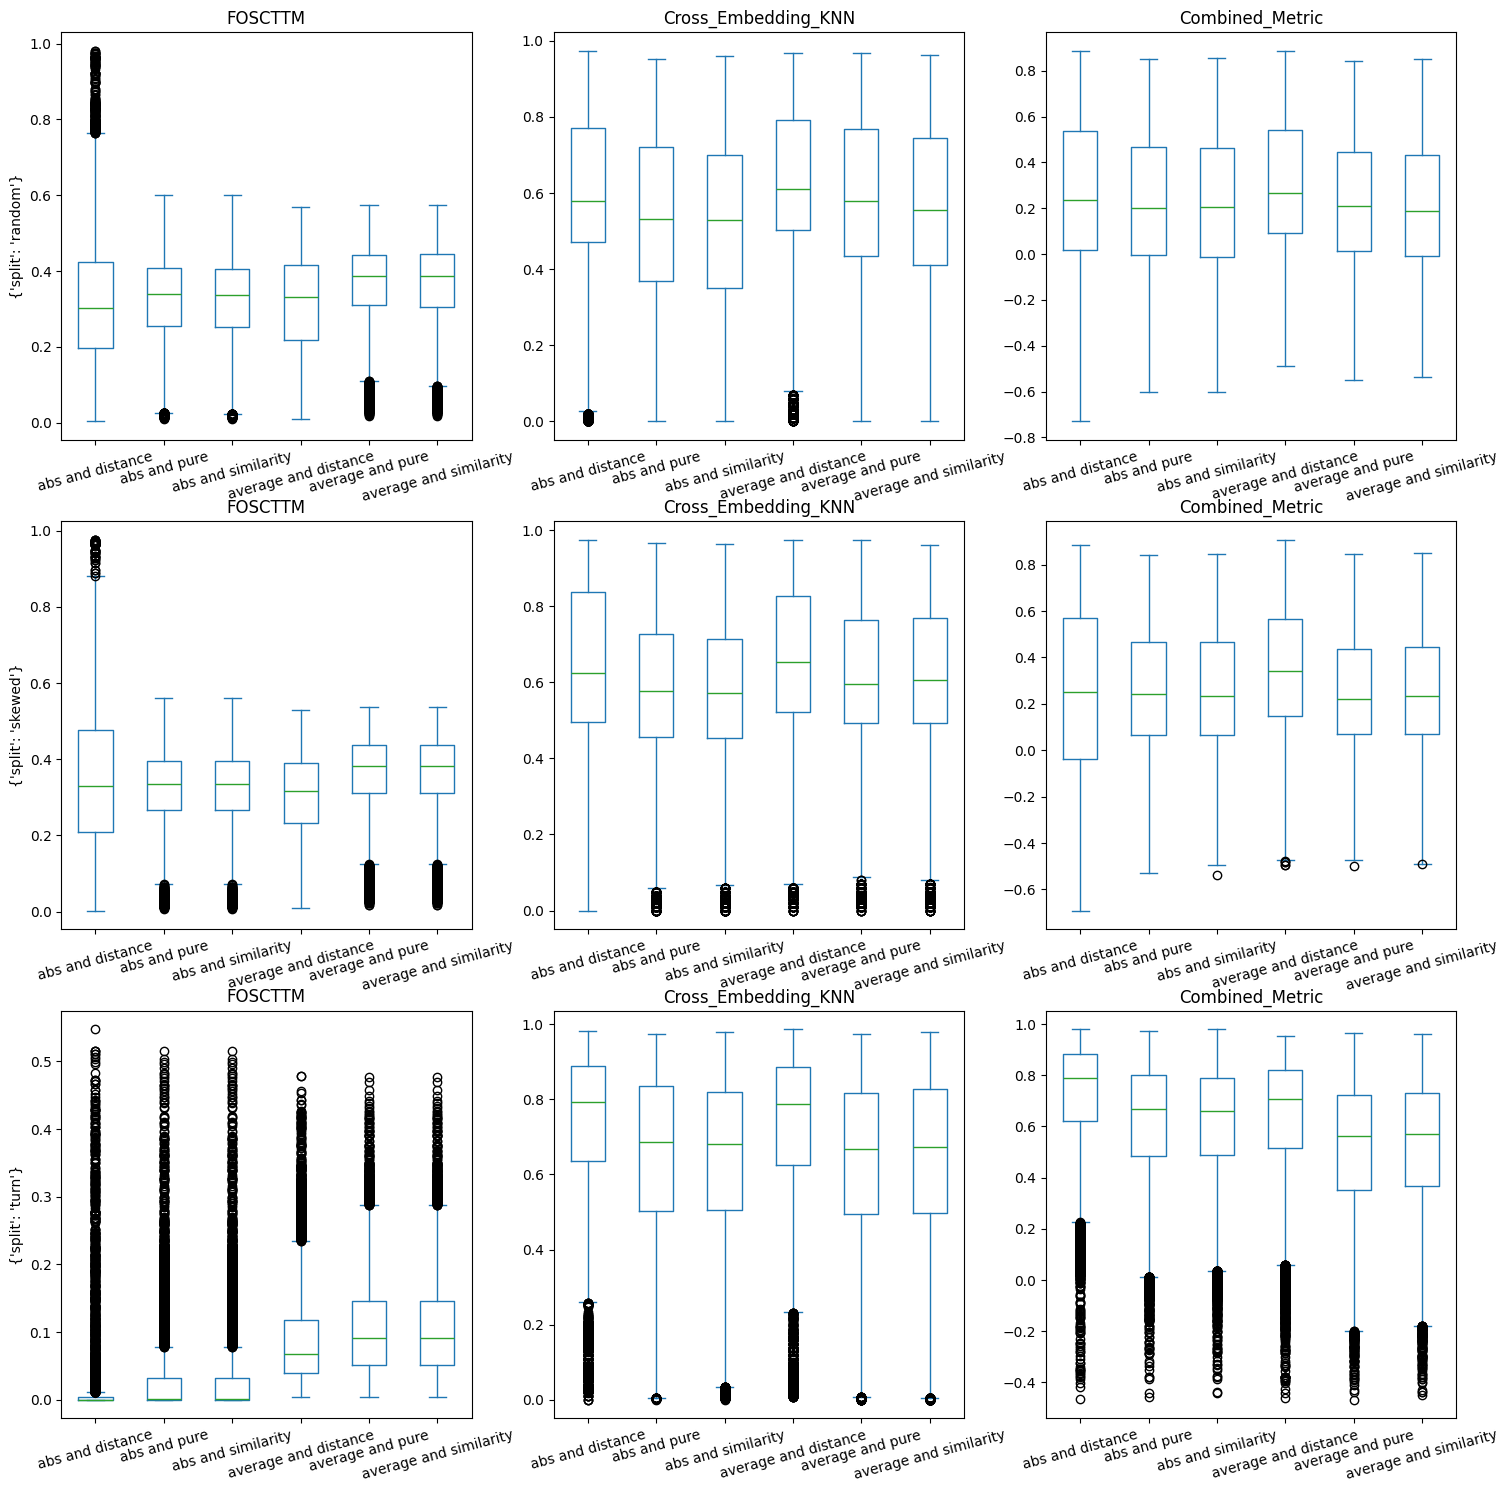

In [13]:
#To make it easier to add edits
key_words = {"figsize": (10, 6),
            "kind": "box",
            "by": "Combined_Arguments",
            "rot": 15}

#Combine DIG argumenst
df_sub = df
df_sub["Combined_Arguments"] = df_sub["Operation"]+ " and " + df_sub["SPUDS_Algorithm"]

columns = [{"column": 'FOSCTTM'}, {"column": 'Cross_Embedding_KNN'}, {"column": 'Combined_Metric'}]
rows = [{"split" : "random" #, "csv_file" : "iris"
         }, 
        {"split" : "skewed"#, "csv_file" : "iris"
         }, 
        {"split" : "turn"#, "csv_file" : "iris"
         }]

plot_in_fig(df = df_sub, columns = columns, rows = rows, **key_words)

## Comparing Methods against CSV Files

DTA seems to be the best on split methods that are made arbitrarily, like the "turn" and the "distort", where as DIG and SPUD preform the best when the data is split "random" or skewed

In [14]:
def plt_methods_by_CSV_max(df = df, sort_by = "SPUD", return_df =False):
    """df should equal the dataframe. It can be subsetted already
    
    Plots the max of the combined metric for each method to each CSV_File
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")["Combined_Metric"].max(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")["Combined_Metric"].max(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")["Combined_Metric"].max(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")["Combined_Metric"].max(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")["Combined_Metric"].max()
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"x" : agregate_df.index,
                "s" : 84,
                "alpha" : .90}

    plt.figure(figsize=(16, 6))
    ax = plt.scatter(y = agregate_df["DTA"], marker = "d", label = "DTA", **key_words)
    ax = plt.scatter(y = agregate_df["SPUD"], label = "SPUD", **key_words) 
    ax = plt.scatter(y = agregate_df["DIG"], marker = '^', label = "DIG", **key_words)
    ax = plt.scatter(y = agregate_df["SSMA"],  marker = 's', label = "SSMA", **key_words)
    ax = plt.scatter(y = agregate_df["NAMA"], marker = '*', label = "NAMA", **key_words)

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"Combined Metric Scores vs. CSV Files (MAX)")
    plt.ylabel("CE - FOSCTTM")
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

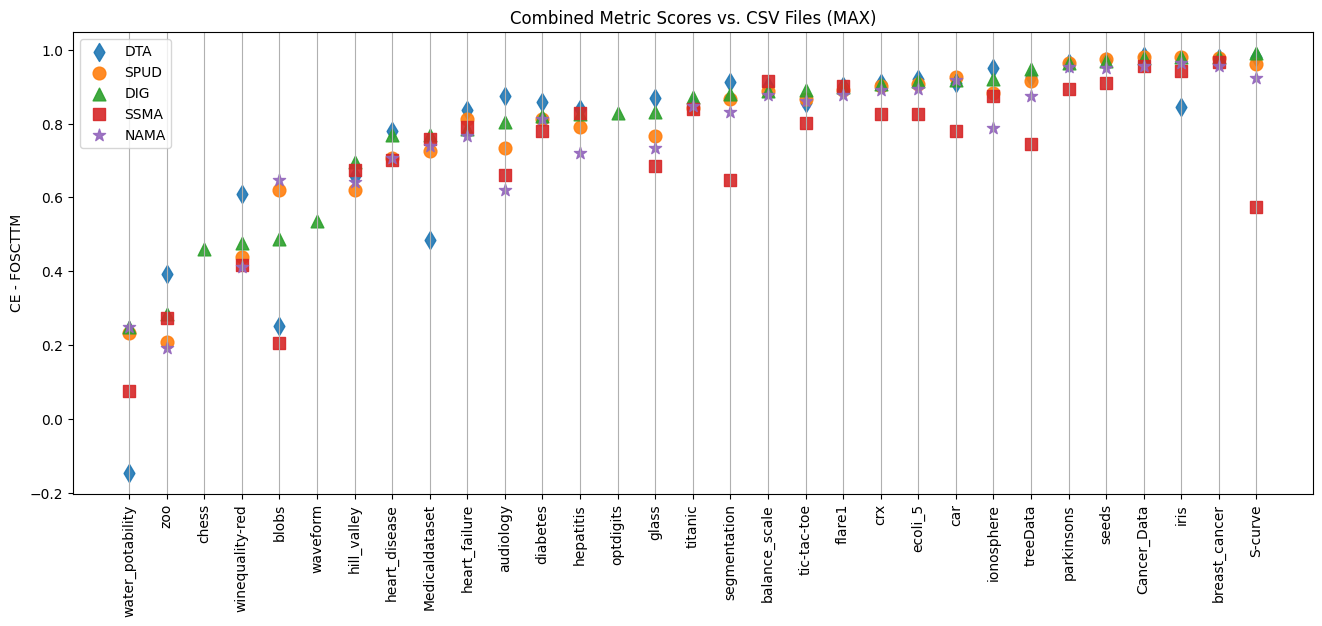

In [15]:
plt_methods_by_CSV_max(df = df, sort_by = "DIG") #This shows all of the data gather
#plt_methods_by_CSV_max(df = subset_df(df, split = "turn"), sort_by="DIG")

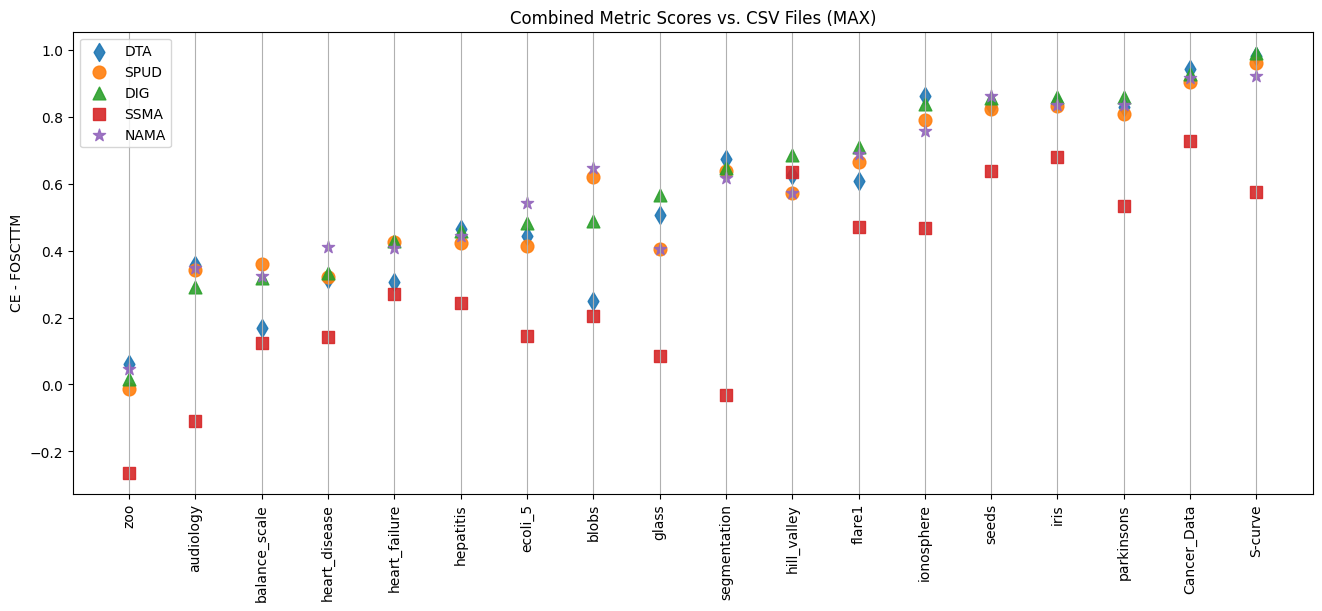

In [16]:
plt_methods_by_CSV_max(df = subset_df(df, split = "even"), sort_by="DIG")

In [17]:
def plt_methods_by_CSV_mean(df = df, sort_by = "SPUD", return_df = False):
    """Plots 95 percent confident intervals for each method against csv files
    
    sort_by should be the string of what the method you want"""

    agregate_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")["Combined_Metric"].mean(),
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")["Combined_Metric"].mean(),
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")["Combined_Metric"].mean(),
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")["Combined_Metric"].mean(),
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")["Combined_Metric"].mean()
    })

    #Calculate error bars
    err_df = pd.DataFrame({
        'SSMA': df[df["method"] == "SSMA"].groupby("csv_file")["Combined_Metric"].std() *2,
        'DTA': df[df["method"] == "DTA"].groupby("csv_file")["Combined_Metric"].std() *2 ,
        'SPUD': df[df["method"] == "SPUD"].groupby("csv_file")["Combined_Metric"].std()*2,
        'DIG': df[df["method"] == "DIG"].groupby("csv_file")["Combined_Metric"].std()*2,
        'NAMA': df[df["method"] == "NAMA"].groupby("csv_file")["Combined_Metric"].std()*2
    })

    agregate_df = agregate_df.sort_values(by = sort_by).reset_index()

    #If we only want the df
    if return_df:
        return agregate_df

    #To make it easier to add edits
    key_words = {"ms" : 8,
                "alpha" : .75}

    plt.figure(figsize=(20, 6))
    ax = plt.errorbar(x = agregate_df.index - 0.1, y = agregate_df["DTA"], yerr = err_df["DTA"], fmt = "d", label = "DTA", **key_words)
    ax = plt.errorbar(x = agregate_df.index, y = agregate_df["SPUD"], yerr = err_df["SPUD"], fmt = "o", label = "SPUD", **key_words) 
    ax = plt.errorbar(x = agregate_df.index + 0.2, y = agregate_df["DIG"], yerr = err_df["DIG"],fmt = '^', label = "DIG", **key_words)
    ax = plt.errorbar(x = agregate_df.index + 0.1, y = agregate_df["SSMA"], yerr = err_df["SSMA"],fmt = 's', label = "SSMA", **key_words)
    ax = plt.errorbar(x = agregate_df.index - 0.2, y = agregate_df["NAMA"], yerr = err_df["NAMA"],fmt = '*', label = "NAMA", **key_words)

    plt.ylim([-0.3, 1])

    #Show Legend
    plt.xticks(ticks= agregate_df.index,labels=agregate_df["csv_file"], rotation = 90)
    plt.title(f"Combined Metric Scores vs. CSV Files (MEAN)")
    plt.ylabel("CE - FOSCTTM")
    plt.grid(visible=True, axis = "x")
    plt.legend()
    plt.show()

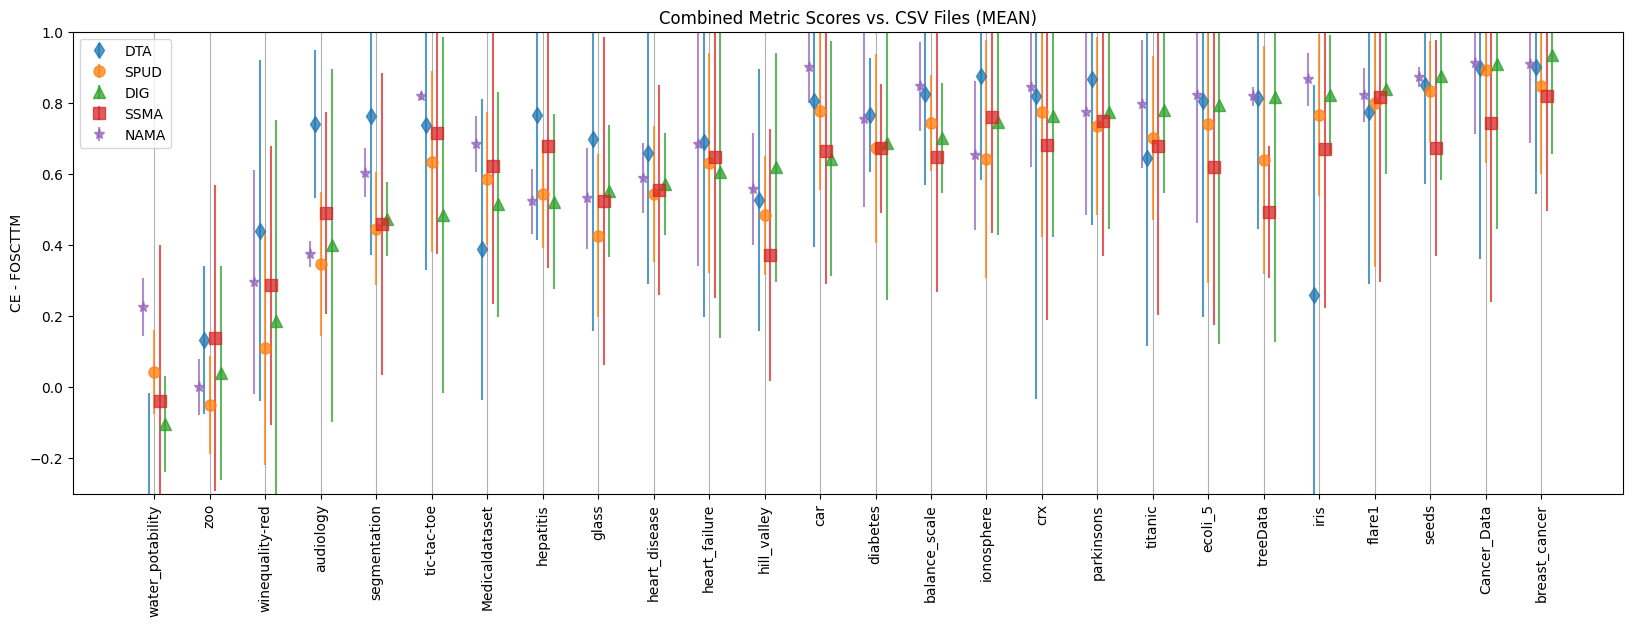

In [18]:
#plt_methods_by_CSV_mean(sort_by="NAMA") #This shows all of the data gather
plt_methods_by_CSV_mean(df = subset_df(df, split = "turn"), sort_by="DIG")

### Rankings
TODO: Have results for different splits

In [19]:
def get_ranks(split = 'No'):
    #Sort by Split
    if split != "No":
        split_df = subset_df(df=df, split = split)
    else:
        split_df = df

    #Sort Df by CSV
    csv_df = plt_methods_by_CSV_max(df = split_df, return_df=True)
    df_ranked = csv_df.drop(columns= ["csv_file"]).rank(ascending=False, method='max', axis = 1)


    #This shows which method has preformed the Best overall
    print(f"Ranked across {split} Split\n-----------------------\n{df_ranked.mean(axis = 0)}")
    print(f"\n \nSTD of Ranks across {split} Split\n----------------------------\n{df_ranked.std(axis = 0)}")
    print(f"\n\nNumber of times each Method did best for each CSV\n--------------------------------------------------\n{csv_df.drop(columns= ['csv_file']).idxmax(axis = 1).value_counts()}")
    df_ranked

In [20]:
get_ranks()

Ranked across No Split
-----------------------
SSMA    4.035714
DTA     2.142857
SPUD    2.821429
DIG     2.000000
NAMA    3.892857
dtype: float64

 
STD of Ranks across No Split
----------------------------
SSMA    1.231745
DTA     1.432798
SPUD    1.055973
DIG     0.894427
NAMA    1.165532
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DTA     14
DIG     10
SPUD     4
NAMA     2
SSMA     1
Name: count, dtype: int64


In [21]:
get_ranks(split = "random")

Ranked across random Split
-----------------------
SSMA    4.833333
DTA     3.208333
SPUD    2.333333
DIG     1.703704
NAMA    2.833333
dtype: float64

 
STD of Ranks across random Split
----------------------------
SSMA    0.637022
DTA     1.178767
SPUD    1.239448
DIG     0.775332
NAMA    0.963087
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DIG     13
SPUD     8
NAMA     3
DTA      3
Name: count, dtype: int64


In [22]:
get_ranks(split = "even")

Ranked across even Split
-----------------------
SSMA    4.833333
DTA     2.444444
SPUD    3.333333
DIG     1.888889
NAMA    2.500000
dtype: float64

 
STD of Ranks across even Split
----------------------------
SSMA    0.707107
DTA     1.247219
SPUD    0.970143
DIG     0.900254
NAMA    1.098127
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DIG     7
DTA     6
NAMA    4
SPUD    1
Name: count, dtype: int64


In [23]:
get_ranks(split = "skewed")

Ranked across skewed Split
-----------------------
SSMA    4.761905
DTA     2.857143
SPUD    3.043478
DIG     1.666667
NAMA    2.476190
dtype: float64

 
STD of Ranks across skewed Split
----------------------------
SSMA    0.700340
DTA     1.276155
SPUD    1.147260
DIG     0.730297
NAMA    1.167007
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DIG     10
NAMA     6
DTA      4
SPUD     3
Name: count, dtype: int64


In [24]:
get_ranks(split = "distort")

Ranked across distort Split
-----------------------
SSMA    4.958333
DTA     1.653846
SPUD    3.038462
DIG     2.653846
NAMA    2.692308
dtype: float64

 
STD of Ranks across distort Split
----------------------------
SSMA    0.204124
DTA     1.231010
SPUD    0.662164
DIG     1.017539
NAMA    1.123182
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DTA     19
NAMA     5
DIG      2
Name: count, dtype: int64


In [25]:
get_ranks(split = "turn")

Ranked across turn Split
-----------------------
SSMA    3.923077
DTA     2.038462
SPUD    2.846154
DIG     2.076923
NAMA    4.115385
dtype: float64

 
STD of Ranks across turn Split
----------------------------
SSMA    1.230385
DTA     1.399450
SPUD    1.084152
DIG     0.890980
NAMA    0.951921
dtype: float64


Number of times each Method did best for each CSV
--------------------------------------------------
DTA     14
DIG      7
SPUD     4
SSMA     1
Name: count, dtype: int64


## Comparing Percent of anchors and KNN values

In [26]:
def line_plot_methods(argument = "Percent_of_Anchors", **kwargs):
    "subset should equal none or the csv file name"

    #Subset the data
    df_subset = subset_df(df, **kwargs)

    #Create figure
    plt.figure(figsize=(14,7))

    #Plot the graphs
    plt.plot(df_subset[df_subset["method"] == "SSMA"].groupby(argument)["Combined_Metric"].mean(), label = "SSMA")
    plt.plot(df_subset[df_subset["method"] == "DTA"].groupby(argument)["Combined_Metric"].mean(), label = "DTA")
    plt.plot(df_subset[df_subset["method"] == "DIG"].groupby(argument)["Combined_Metric"].mean(), label = "DIG")

    #Show different SPUD arguments
    plt.plot(df_subset[df_subset["Operation"] == "average"].groupby(argument)["Combined_Metric"].mean(), label = "SPUD - Avg")
    plt.plot(df_subset[df_subset["Operation"] == "abs"].groupby(argument)["Combined_Metric"].mean(), label = "SPUD - Abs")

    if argument != "Percent_of_KNN":
        plt.plot(df_subset[df_subset["method"] == "NAMA"].groupby(argument)["Combined_Metric"].mean(), label = "NAMA")



    #Make it pretty
    plt.xlabel(argument)
    plt.ylabel("Combined Metric Score (CE - FOSCTTM)")
    plt.legend()
    plt.title("Methods Together")

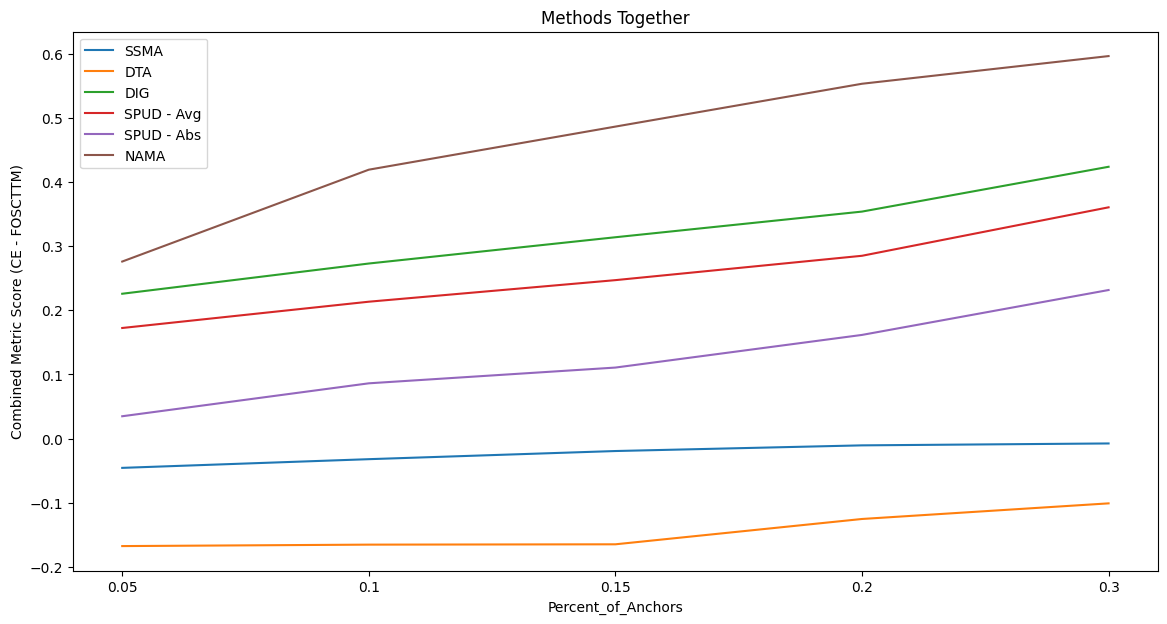

In [55]:
line_plot_methods(csv_file = "blobs", split = "even")

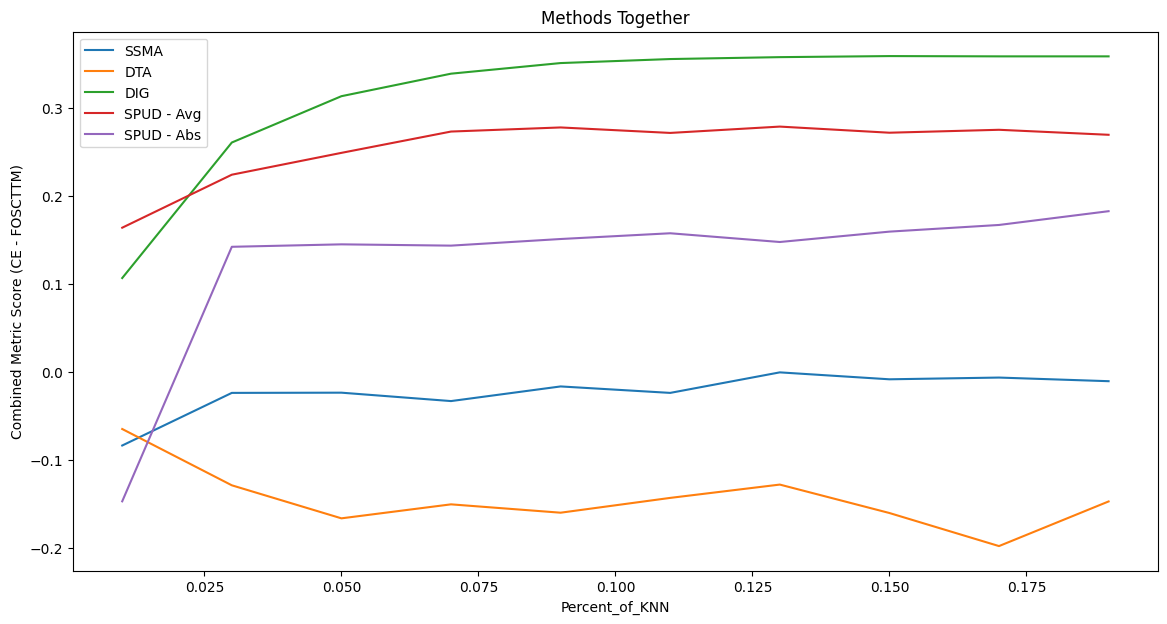

In [56]:
line_plot_methods(argument = "Percent_of_KNN", split = "even", csv_file = "blobs")

## Plotting the Embeddings

In [29]:
visual_test = tma.test_manifold_algorithms(csv_file="S-curve", split= "skewed", percent_of_anchors= [0.1, 0.25], verbose=2)


 
 
---------------------------       Initalizing class with S-curve data       ---------------------------

Creating swiss rolls and S curve data
The knn values are: (2, 7, 12, 17, 22, 27, 32, 37, 42, 47)


Percent of anchors used: 0.25
The amount of Nearest Neighbors: 5


/yunity/arusty/.local/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


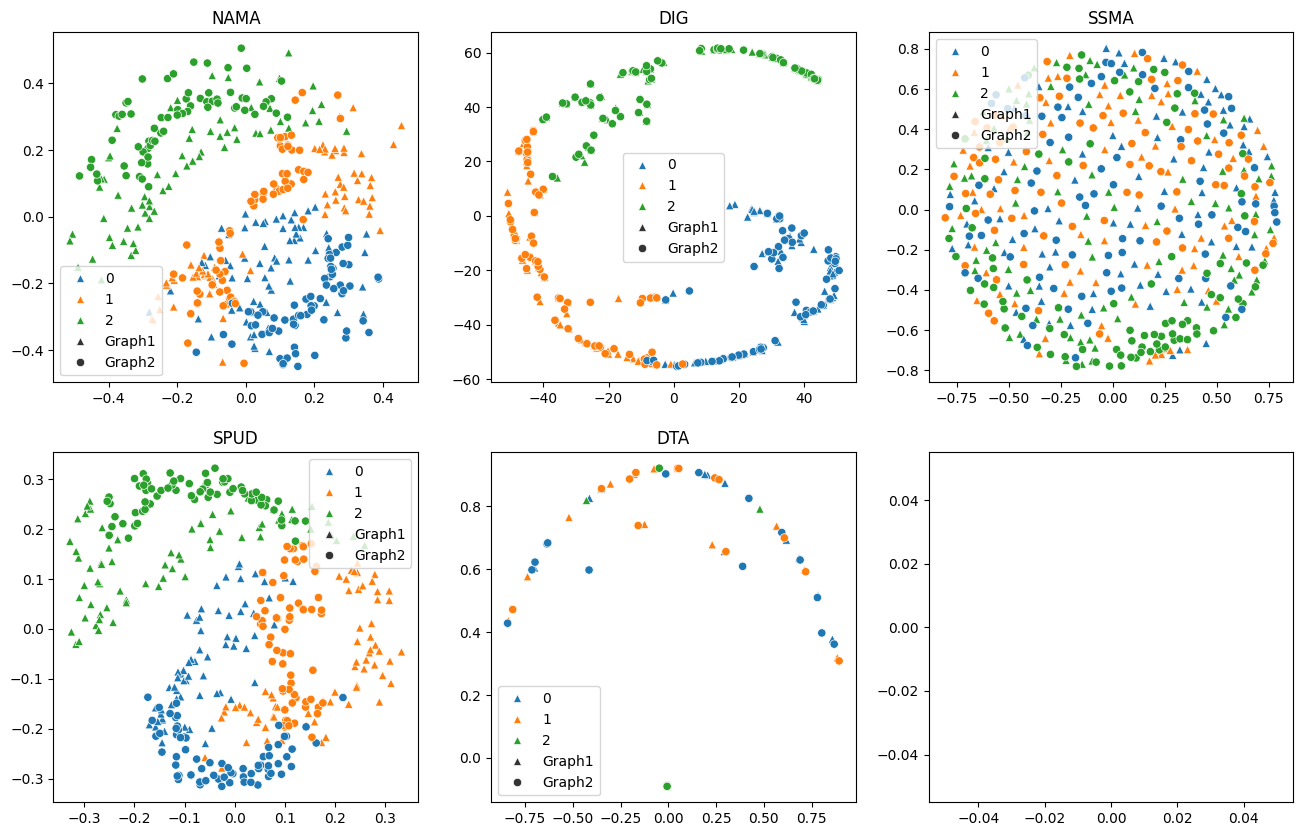

In [30]:
visual_test.plot_embeddings(knn = 5)

Percent of anchors used: 0.25
The amount of Nearest Neighbors: 48


/yunity/arusty/.local/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:531: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "
/yunity/arusty/.local/lib/python3.10/site-packages/ot/bregman/_sinkhorn.py:747: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


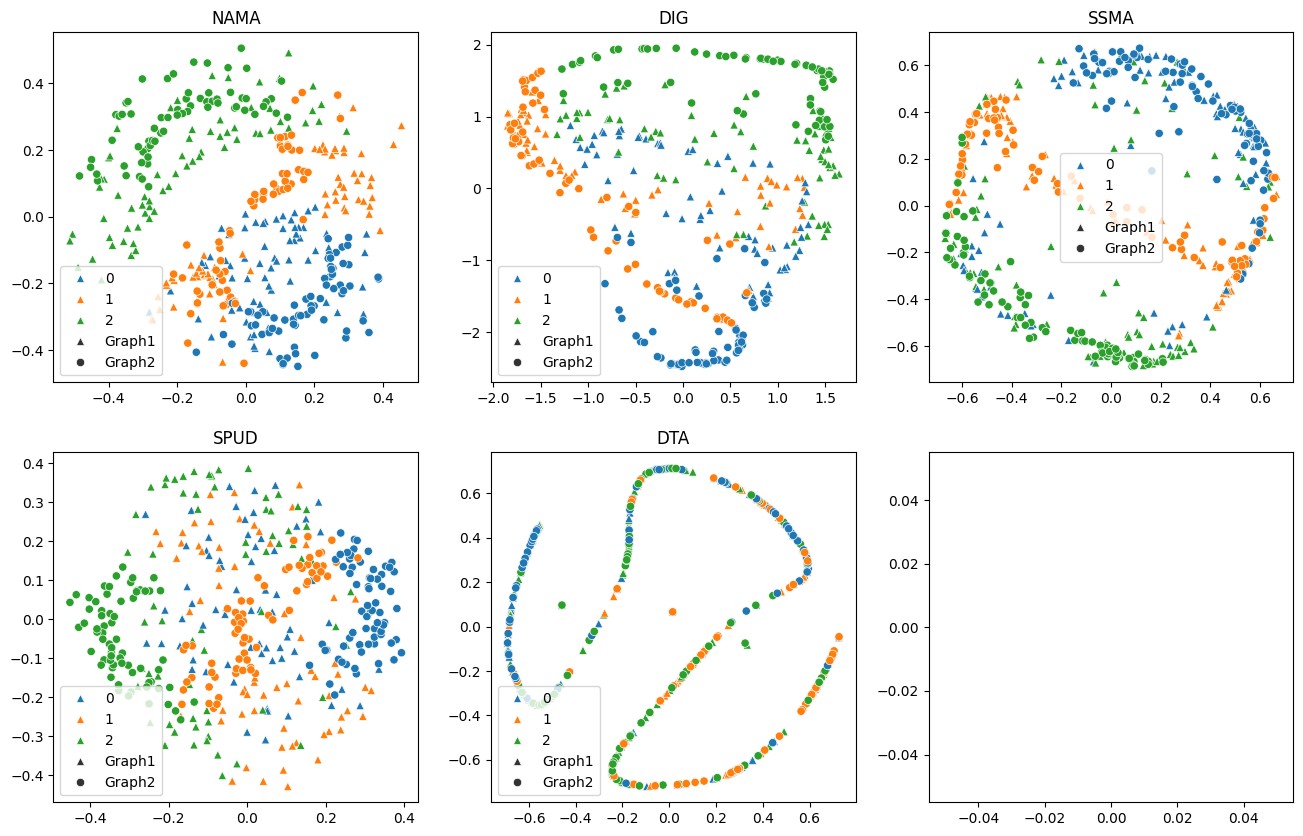

In [31]:
visual_test.plot_embeddings(knn = 48, operation = "abs")

# Debugging Tests Below


 
 
---------------------------       Initalizing class with iris.csv data       ---------------------------



Spliting the data evenly
Split A features shape: (150, 2)
Split B Features shape (150, 2)
MDS initialized with 2 components
The knn values are: (2, 6, 10, 14, 18, 22, 26, 30, 34, 38)
Batch 1 shape: (150, 2) Batch 2 shape: (150, 2)


2024-05-22 21:17:01.838451: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


Losses: D G 0.673 0.251


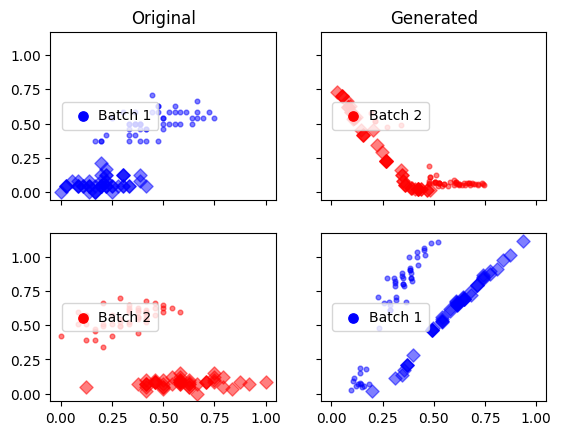

Losses: D G 0.692 0.230


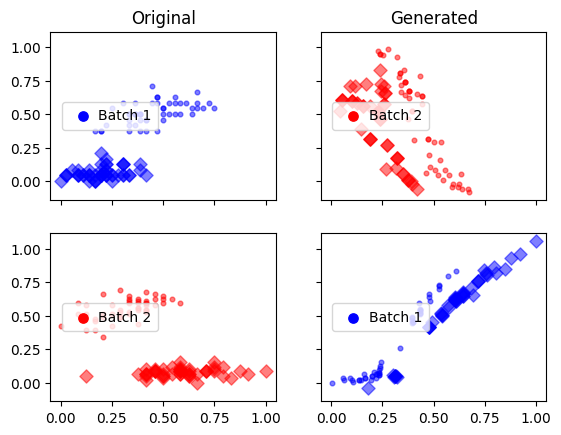

Losses: D G 0.693 0.233


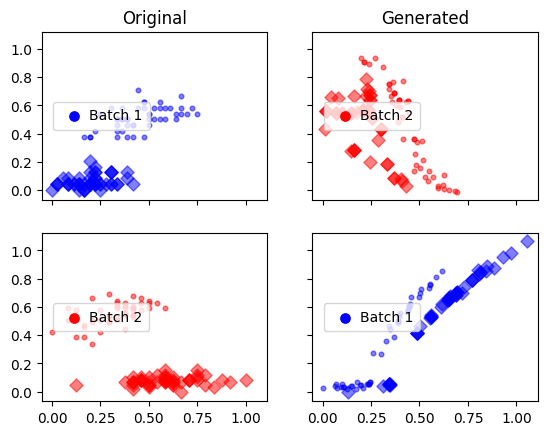

Losses: D G 0.692 0.238


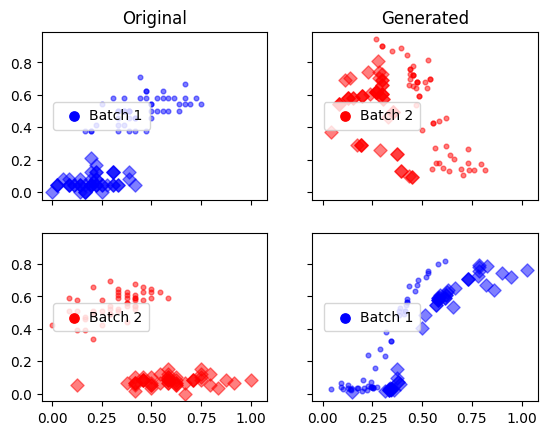

In [32]:
#MAGAN TRIALS - 
import MAGAN
import test_manifold_algorithms as tma
import numpy as np
test = tma.test_manifold_algorithms(csv_file="iris.csv", split = "even", percent_of_anchors = [0.05], random_state=42, verbose = 2)
#xb1 , xb2, labelsA, labelsB = MAGAN.get_data()

domain_a, domain_b, domain_ab, domain_ba = MAGAN.run_MAGAN(test.split_A, test.split_B, labels1 = test.labels)
#domain_a, domain_b, domain_ab, domain_ba = MAGAN.run_MAGAN(xb1, xb2, labelsA, labelsB)

In [33]:
domain_a, domain_b = MAGAN.get_pure_distance(domain_a, domain_b)
domain_ab, domain_ba = MAGAN.get_pure_distance(domain_ab, domain_ba)
magan_block = np.block([[domain_a, domain_ba],
                        [domain_ba, domain_b]])

In [34]:
test.FOSCTTM(domain_ab), test.FOSCTTM(domain_ba)

(0.0016, 0.002444444444444445)

In [35]:
from sklearn.manifold import MDS
mds = MDS(metric=True, dissimilarity = 'precomputed', random_state = 42, n_components=2)
emb = mds.fit_transform(magan_block)

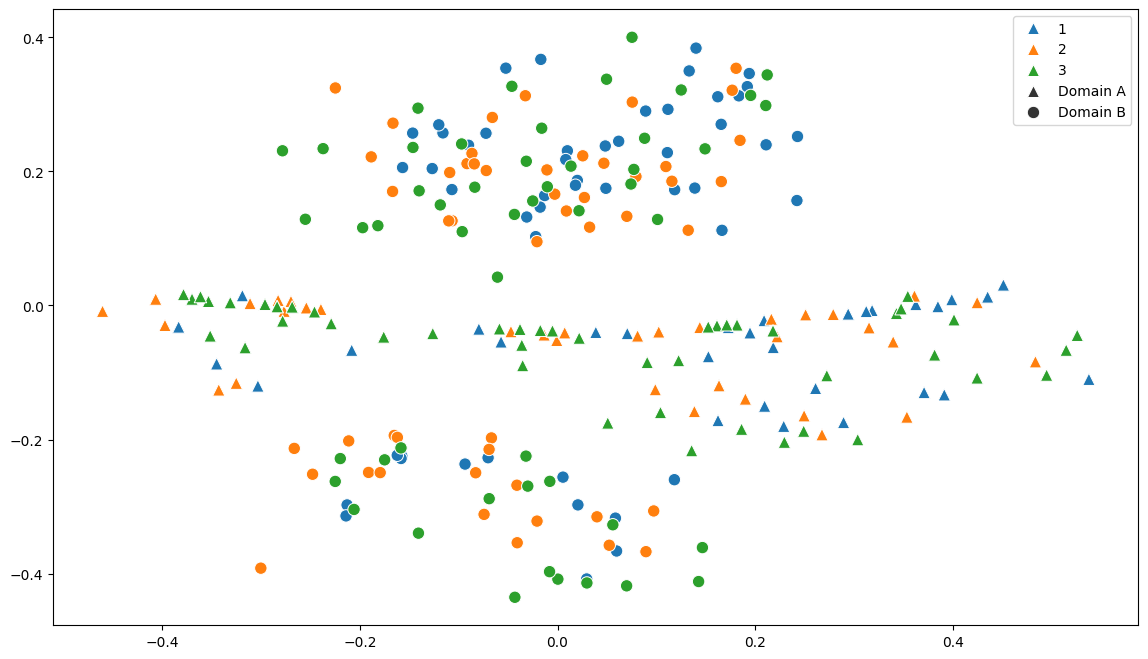

In [36]:
#Veiw the manifold. Those shown as Triangles are from GX
styles = ['Domain A' if i < len(emb[:]) / 2 else 'Domain B' for i in range(len(emb[:]))]

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
ax = sns.scatterplot(x = emb[:, 0], y = emb[:, 1], hue = pd.Categorical(test.labels_doubled), style = styles, s=80, markers= {"Domain A": "^", "Domain B" : "o"})
#ax.scatter(emb[test.known_anchors_A, 0], emb[test_class.known_anchors_A, 1], s = 7, color = 'black')

In [37]:
len(emb), len(test.labels_doubled), len(domain_a), len(domain_ab) #Why are they not 150? -> it seems effected by batch sizes

(300, 300, 150, 150)

In [38]:
#Stress is a value of how well the emd did. Lower the better.
print(f"Our New Model Stress: {mds.stress_}")
test.cross_embedding_knn(emb, (test.labels, test.labels), knn_args = {'n_neighbors': 5})

Our New Model Stress: 714.1881803521808


0.34